In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('train.csv')
df.shape

(1460, 81)

In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

# Data Analysis

## Checking For Missing Values

In [5]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]
print(features_with_na)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [7]:
for feature in features_with_na:
    print(f"{feature}\t\t{df[feature].isnull().sum()}\t\t{np.round(df[feature].isnull().mean(),4)}")


LotFrontage		259		0.1774
Alley		1369		0.9377
MasVnrType		8		0.0055
MasVnrArea		8		0.0055
BsmtQual		37		0.0253
BsmtCond		37		0.0253
BsmtExposure		38		0.026
BsmtFinType1		37		0.0253
BsmtFinType2		38		0.026
FireplaceQu		690		0.4726
GarageType		81		0.0555
GarageYrBlt		81		0.0555
GarageFinish		81		0.0555
GarageQual		81		0.0555
GarageCond		81		0.0555
PoolQC		1453		0.9952
Fence		1179		0.8075
MiscFeature		1406		0.963


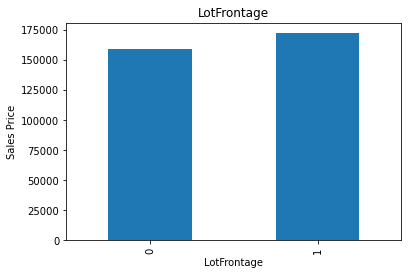

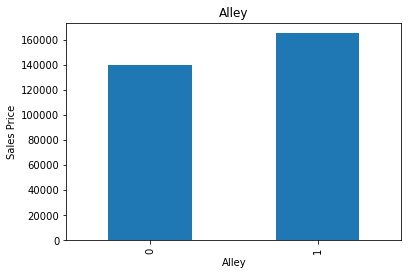

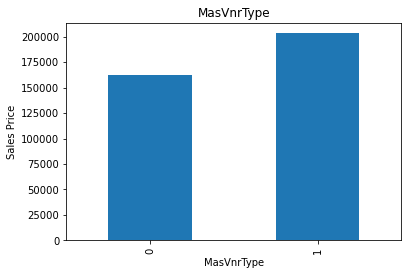

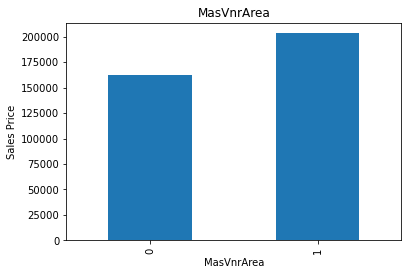

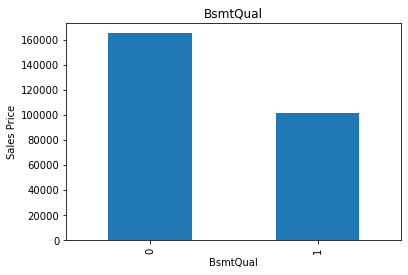

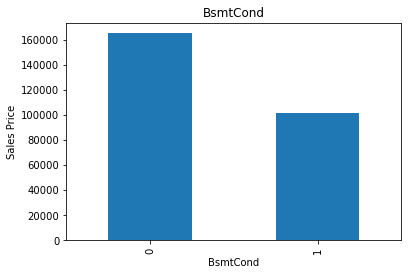

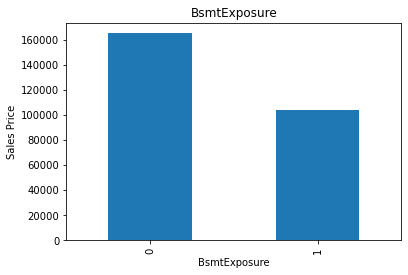

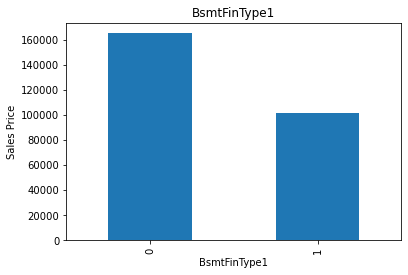

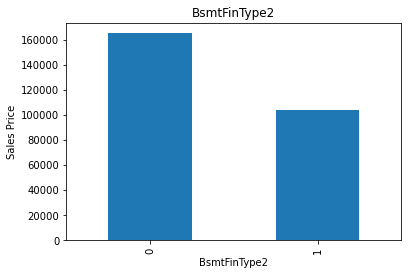

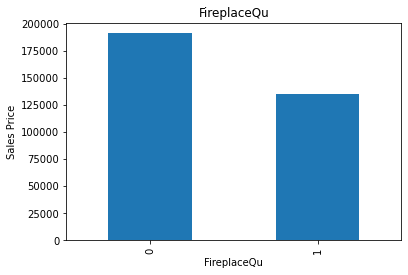

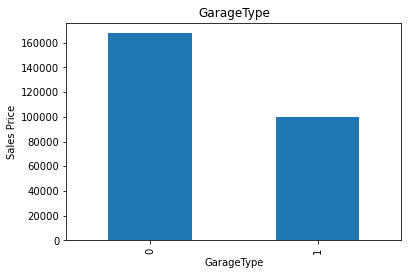

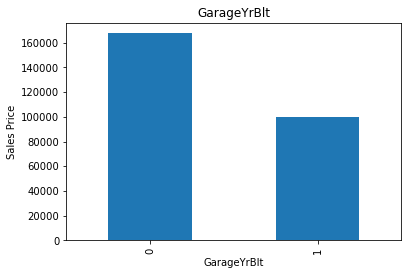

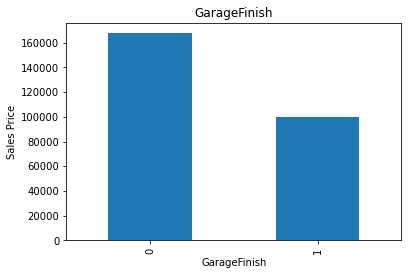

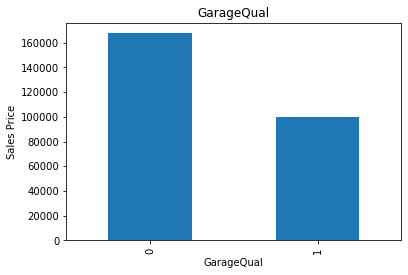

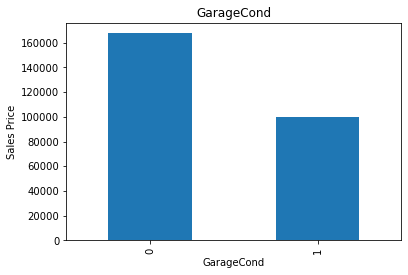

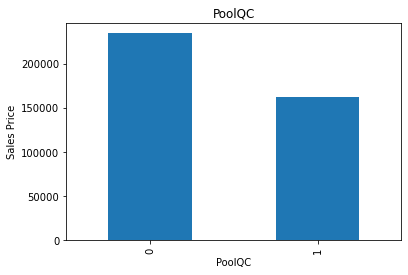

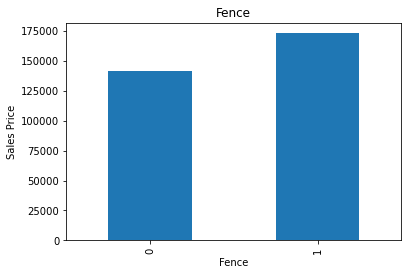

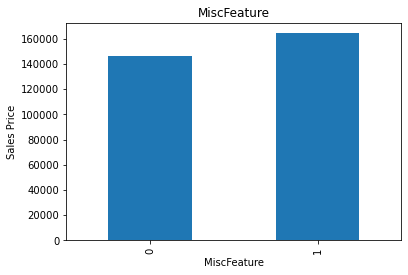

In [8]:
for feature in features_with_na:
    data = df.copy()
    data[feature] = np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.ylabel('Sales Price')
    plt.title(feature)
    plt.show()

From The Plots we come to know that we need to fill these missing values with something meaningful which we will do in the feature engineering section

In [9]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [10]:
num_features = [features for features in df.columns if df[features].dtype!='O']
print(len(num_features))

38


In [11]:
df[num_features].head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [12]:
obj_features = [features for features in df.columns if df[features].dtype=='O']
print(len(obj_features))

43


In [13]:
df[obj_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [14]:
year_feature = [feature for feature in num_features if 'Yr' in feature or 'Year' in feature]
print(year_feature)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [15]:
df[year_feature].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
3       1915          1970       1998.0    2006
4       2000          2000       2000.0    2008

In [16]:
for feature in year_feature:
    print(feature)
    print(df[feature].unique())
    print("\n")

YearBuilt
[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]


YearRemodAdd
[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]


GarageYrBlt
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2

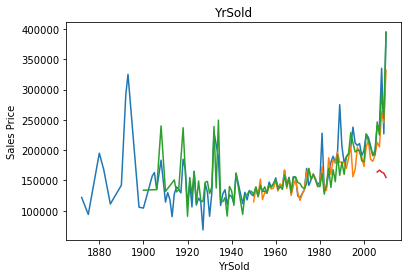

In [17]:
for feature in year_feature:
    df.groupby(feature)['SalePrice'].median().plot()
    plt.ylabel('Sales Price')
    plt.title(feature)

Text(0.5, 1.0, 'House Price vs YearSold')

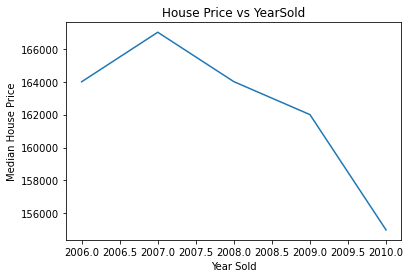

In [18]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

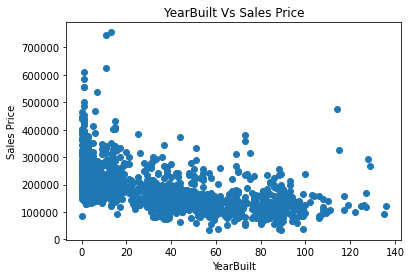

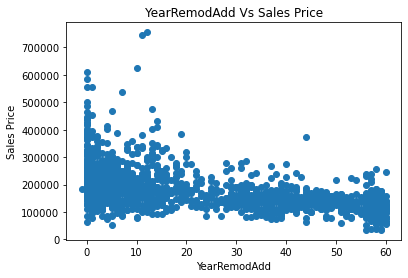

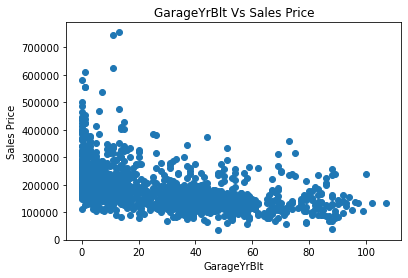

In [19]:
for feature in year_feature:
    if feature!='YrSold':
        d = df.copy()
        d[feature] = d['YrSold'] - d[feature]
        plt.scatter(d[feature],d['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel("Sales Price")
        plt.title(f"{feature} Vs Sales Price")
        plt.show()

In [20]:
discrete_features = [feature for feature in num_features if len(df[feature].unique())<25 and feature not in year_feature+['Id']]
print(len(discrete_features))

17


In [21]:
df[discrete_features].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

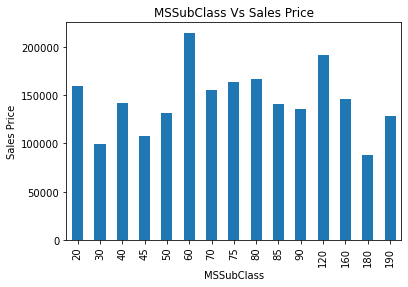

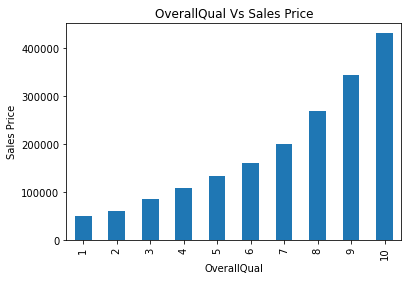

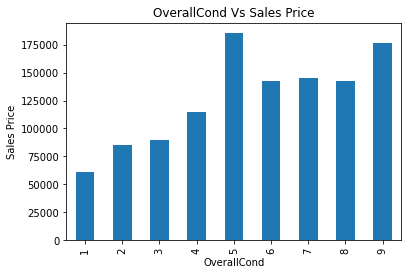

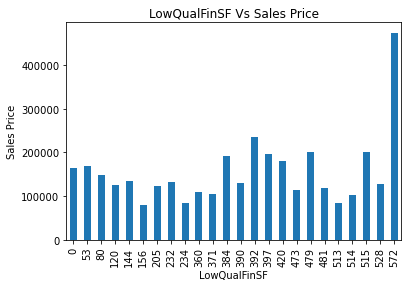

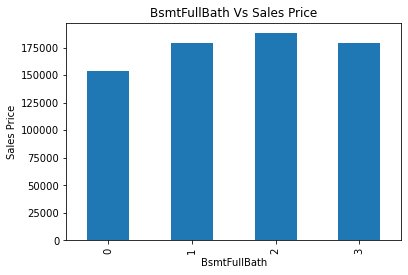

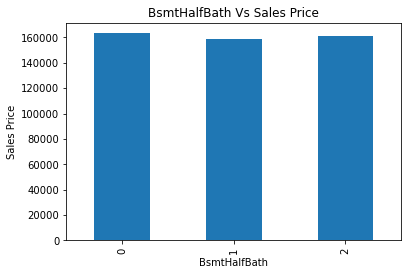

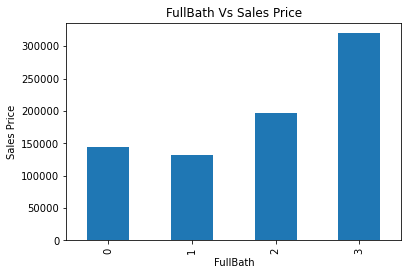

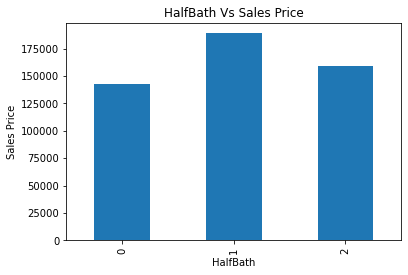

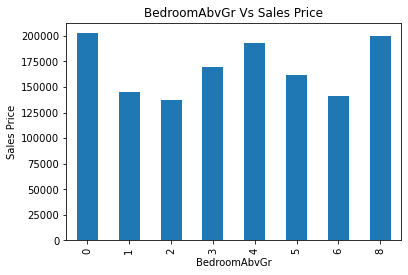

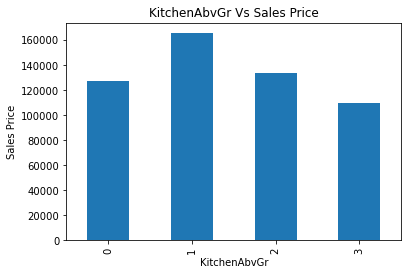

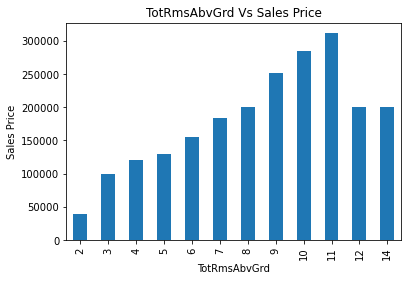

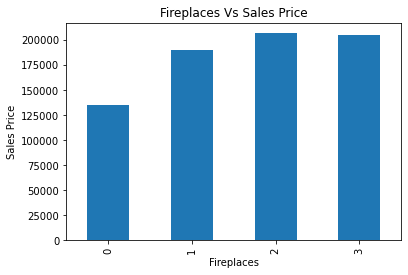

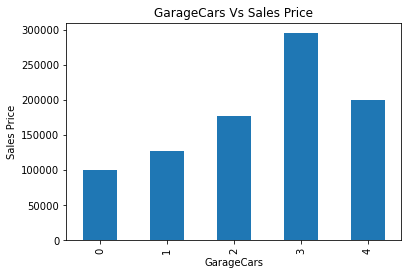

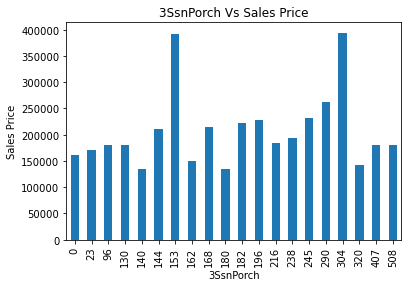

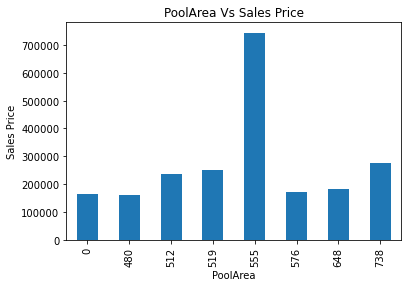

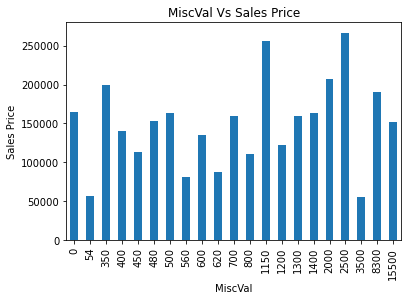

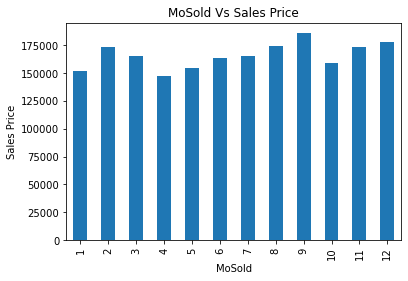

In [22]:
for feature in discrete_features:
    df1 = df.copy()
    df1.groupby(feature)['SalePrice'].median().plot.bar()
    plt.ylabel('Sales Price')
    plt.title(f"{feature} Vs Sales Price")
    plt.show()

In [23]:
continous_feature = [feature for feature in num_features if feature not in discrete_features+['Id']+year_feature]

In [24]:
print(len(continous_feature))

16


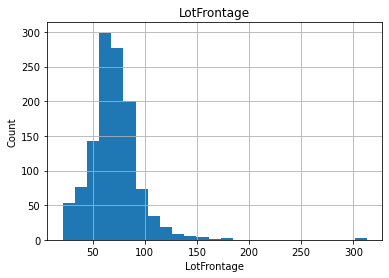

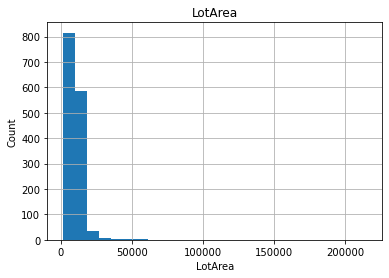

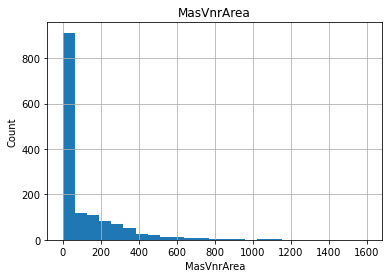

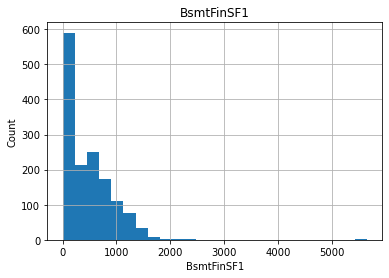

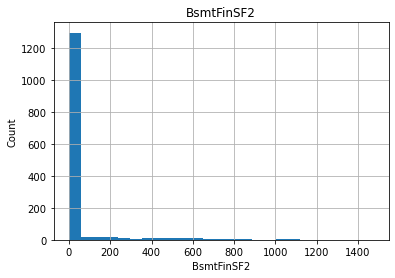

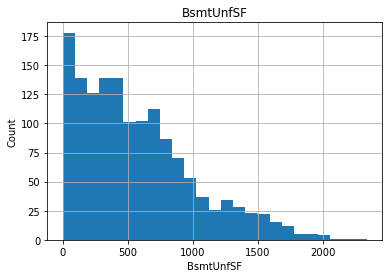

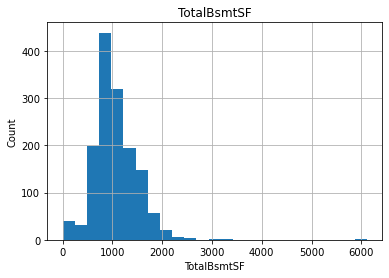

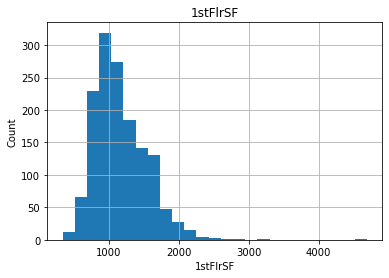

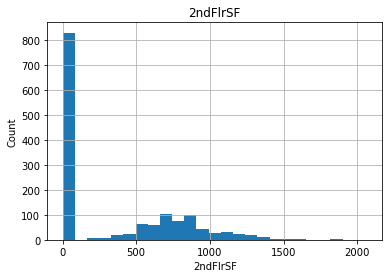

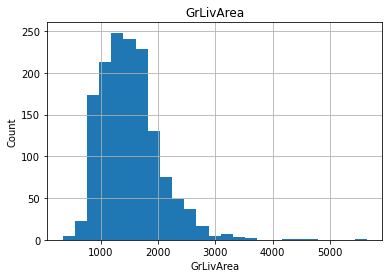

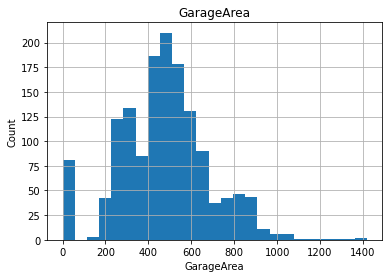

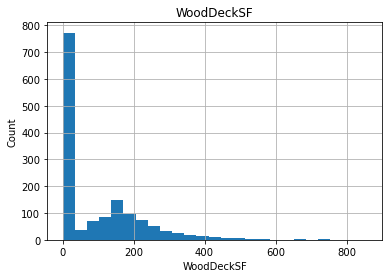

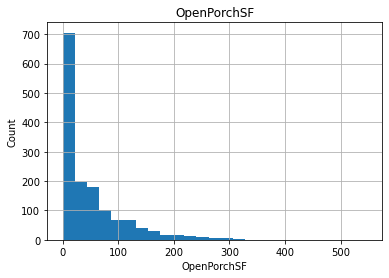

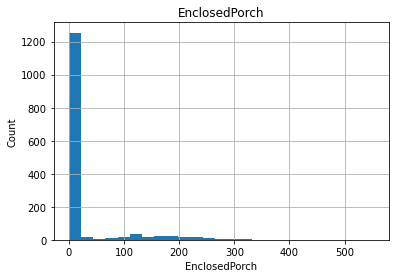

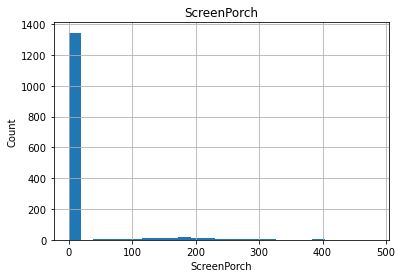

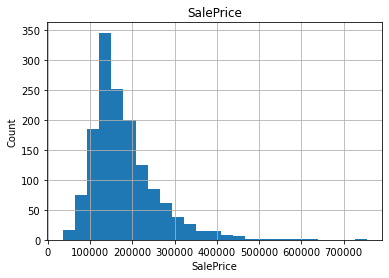

In [25]:
for feature in continous_feature:
    data = df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Guassian Distribution
https://medium.datadriveninvestor.com/how-would-i-know-if-my-variable-distribution-is-gaussian-c3b215383469

In [26]:
from scipy.stats import shapiro
for feature in continous_feature:
    print(f'{feature}: {"Not Gaussian" if shapiro(df[feature])[1]<0.05 else "Gaussian"}  {shapiro(df[feature])}')

LotFrontage: Gaussian  ShapiroResult(statistic=nan, pvalue=1.0)
LotArea: Not Gaussian  ShapiroResult(statistic=0.3510589599609375, pvalue=0.0)
MasVnrArea: Gaussian  ShapiroResult(statistic=nan, pvalue=1.0)
BsmtFinSF1: Not Gaussian  ShapiroResult(statistic=0.8479605913162231, pvalue=2.8140120808220724e-35)
BsmtFinSF2: Not Gaussian  ShapiroResult(statistic=0.3272829055786133, pvalue=0.0)
BsmtUnfSF: Not Gaussian  ShapiroResult(statistic=0.9304239153862, pvalue=1.6411276150348104e-25)
TotalBsmtSF: Not Gaussian  ShapiroResult(statistic=0.9173526763916016, pvalue=1.6116577553235961e-27)
1stFlrSF: Not Gaussian  ShapiroResult(statistic=0.9269489645957947, pvalue=4.5177059476948354e-26)
2ndFlrSF: Not Gaussian  ShapiroResult(statistic=0.766804575920105, pvalue=2.5150504837701817e-41)
GrLivArea: Not Gaussian  ShapiroResult(statistic=0.9279828071594238, pvalue=6.598091159538852e-26)
GarageArea: Not Gaussian  ShapiroResult(statistic=0.9753278493881226, pvalue=4.018698690337087e-15)
WoodDeckSF: Not 

Most OF Features are non guassian

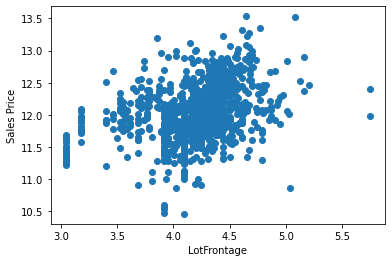

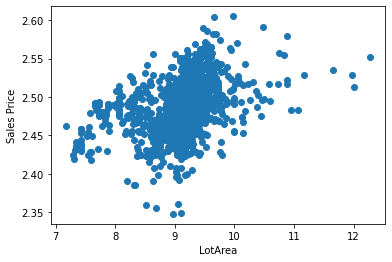

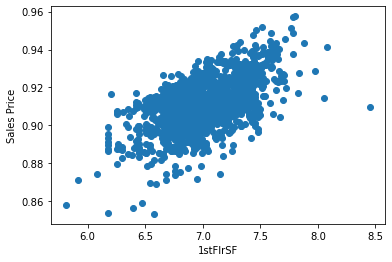

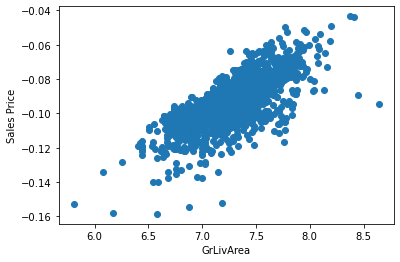

c:\Users\JAINAM\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


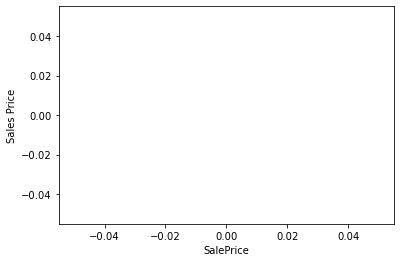

In [27]:
data = df.copy()
for feature in continous_feature:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sales Price')
        plt.show()

## Outlier

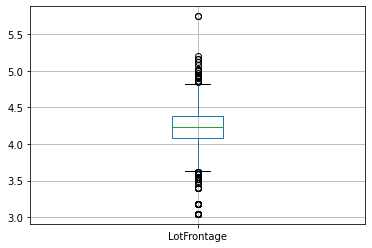

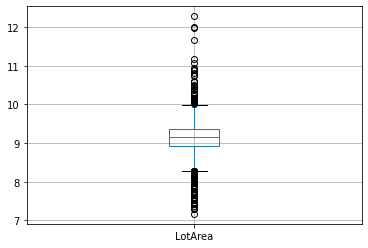

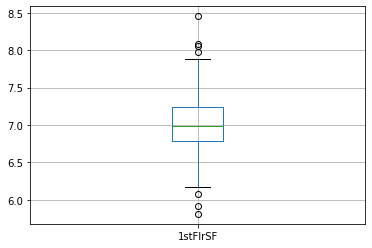

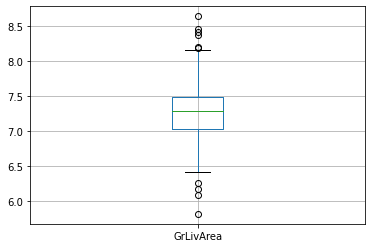

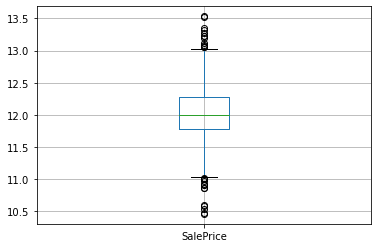

In [28]:
for feature in continous_feature:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.show()

## Categorical Features

In [29]:
for feature in obj_features:
    print(f'The feature is {feature} and unqiue categories are : {len(df[feature].unique())}')

The feature is MSZoning and unqiue categories are : 5
The feature is Street and unqiue categories are : 2
The feature is Alley and unqiue categories are : 3
The feature is LotShape and unqiue categories are : 4
The feature is LandContour and unqiue categories are : 4
The feature is Utilities and unqiue categories are : 2
The feature is LotConfig and unqiue categories are : 5
The feature is LandSlope and unqiue categories are : 3
The feature is Neighborhood and unqiue categories are : 25
The feature is Condition1 and unqiue categories are : 9
The feature is Condition2 and unqiue categories are : 8
The feature is BldgType and unqiue categories are : 5
The feature is HouseStyle and unqiue categories are : 8
The feature is RoofStyle and unqiue categories are : 6
The feature is RoofMatl and unqiue categories are : 8
The feature is Exterior1st and unqiue categories are : 15
The feature is Exterior2nd and unqiue categories are : 16
The feature is MasVnrType and unqiue categories are : 5
The f

In [30]:
df[obj_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

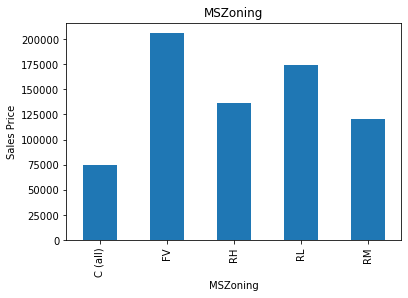

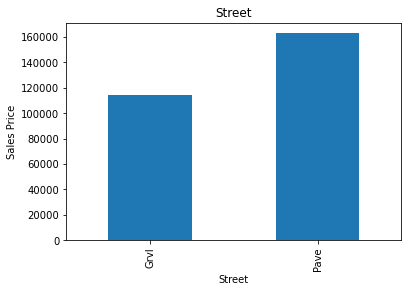

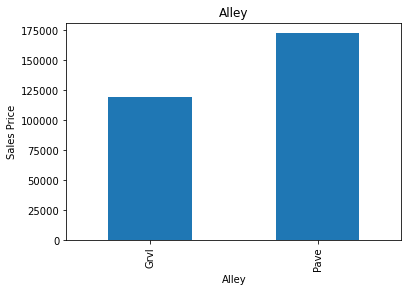

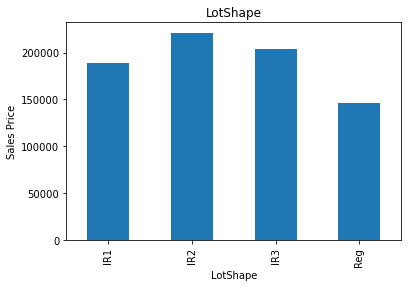

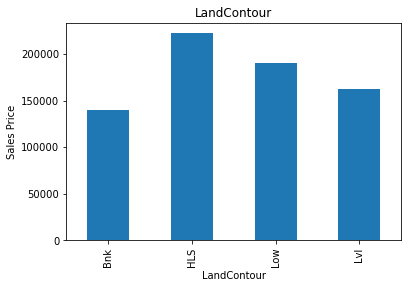

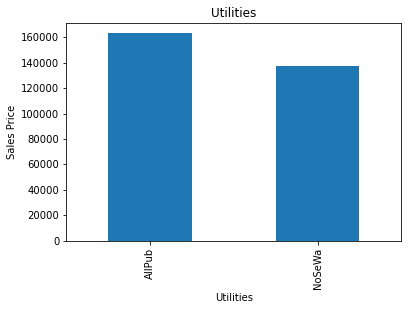

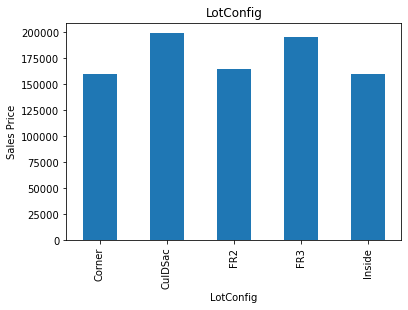

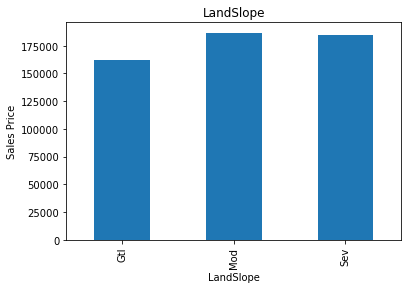

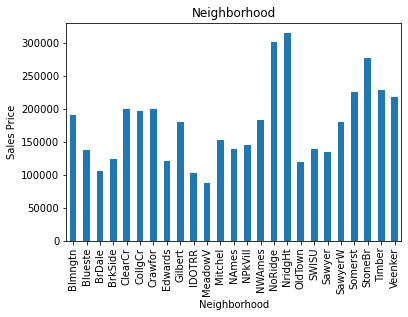

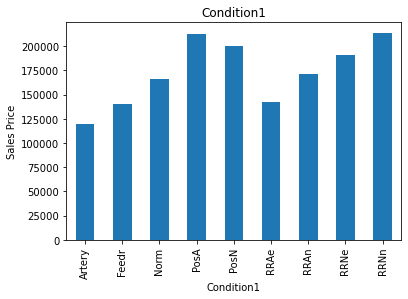

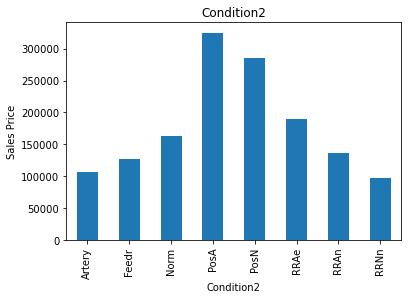

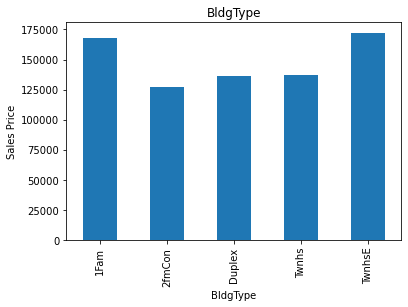

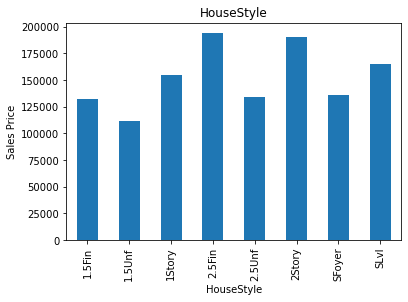

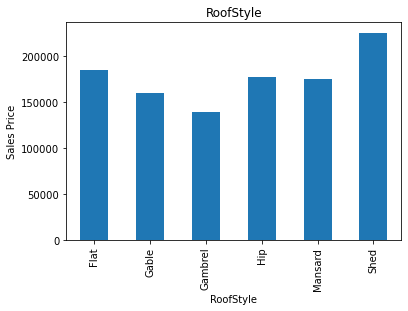

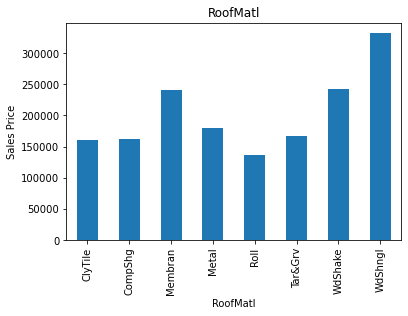

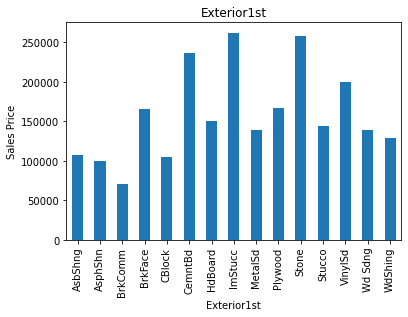

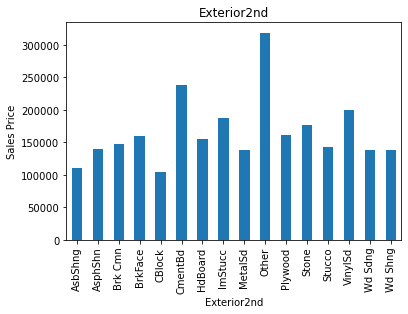

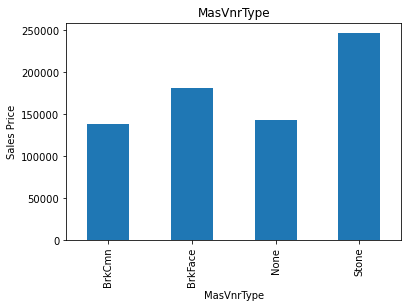

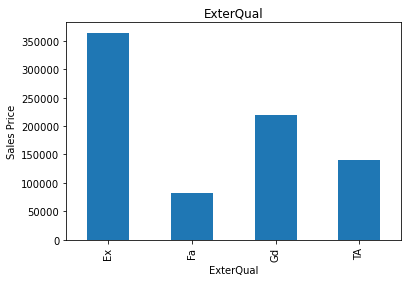

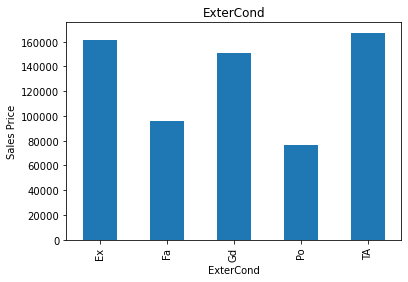

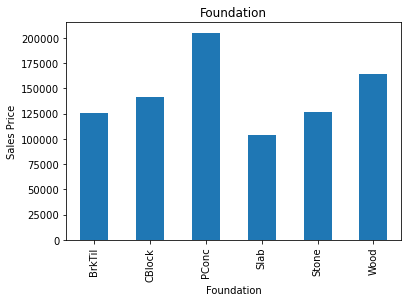

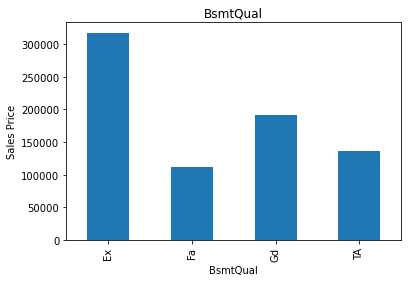

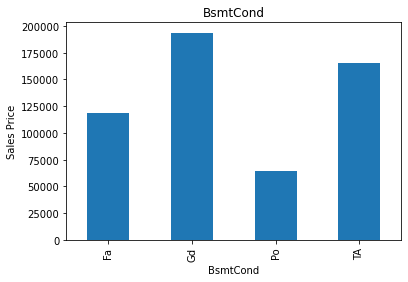

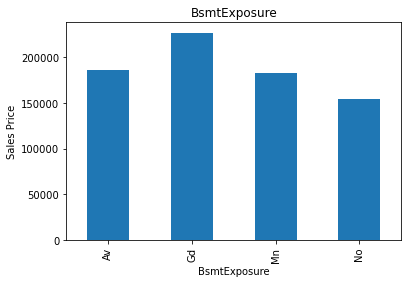

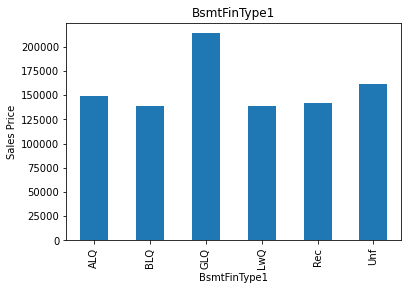

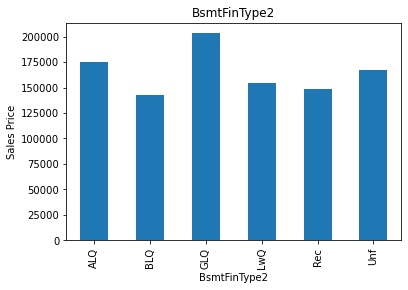

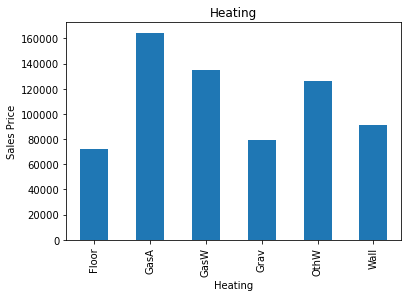

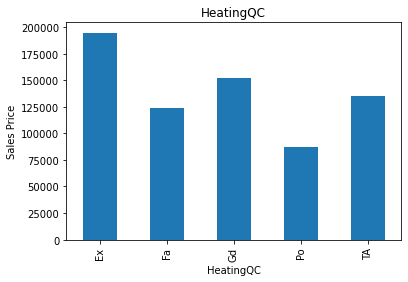

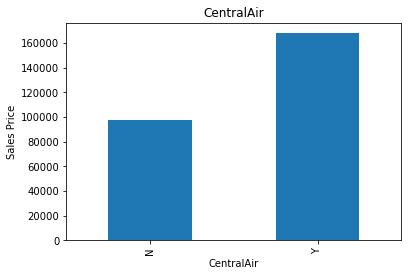

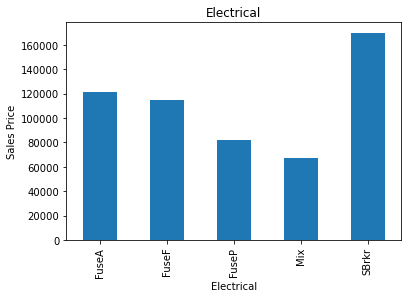

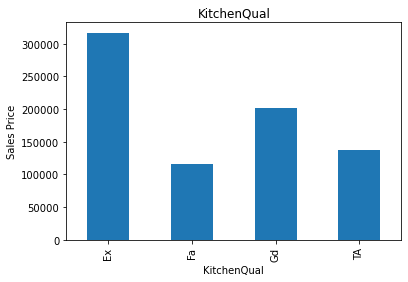

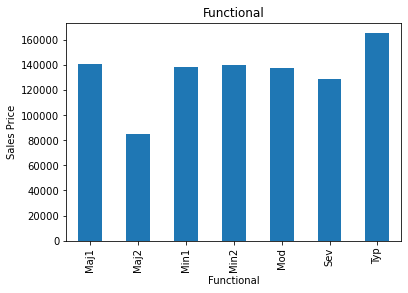

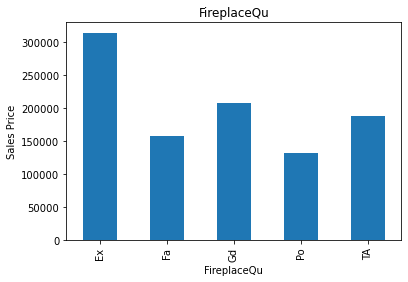

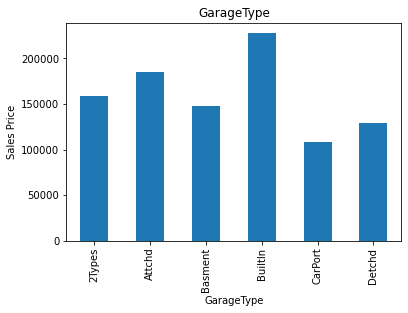

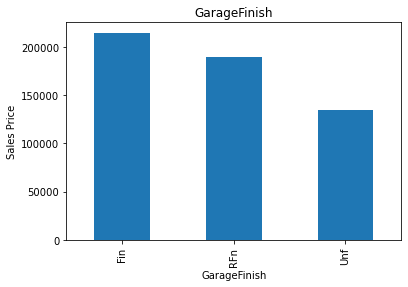

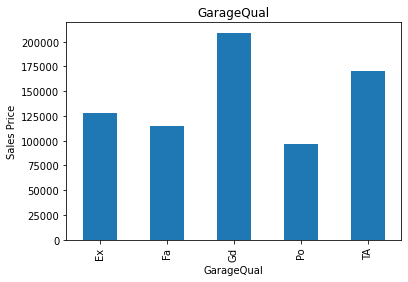

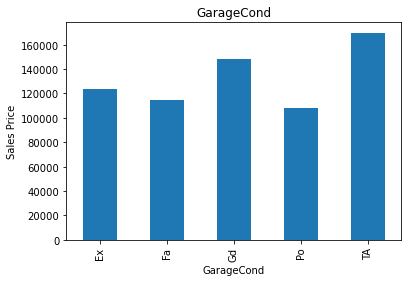

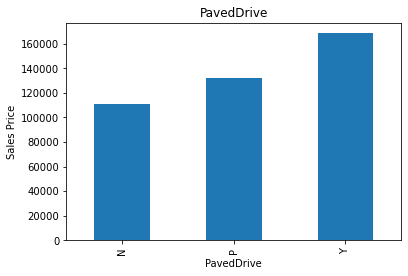

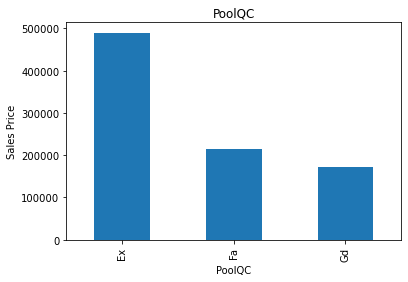

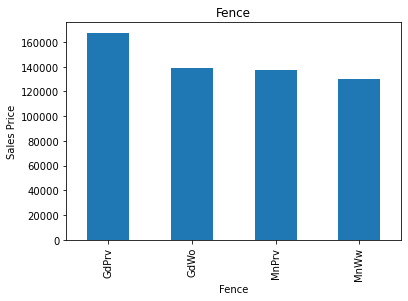

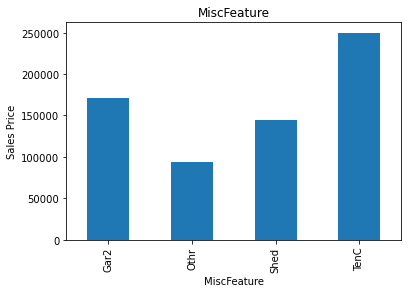

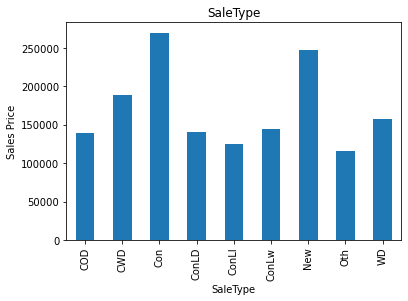

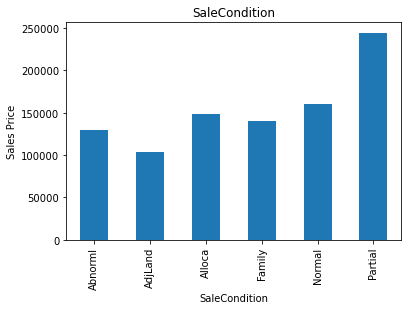

In [31]:
for feature in obj_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sales Price')
    plt.title(feature)
    plt.show()

# Feature Engineering

## Missing Values

In [32]:
print(features_with_na)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [33]:
features_with_na_cat = [feature for feature in features_with_na if data[feature].dtype=='O']
print(features_with_na_cat)

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [34]:
data[features_with_na_cat].isna().sum()

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [35]:
#FILL THE NULL VALUES WITH "Missing" Value
def replace_cat_feature(data, feature):
    d = data.copy()
    d[feature]=d[feature].fillna('Missing')
    return d
df = replace_cat_feature(df,features_with_na_cat)
df[features_with_na_cat].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [36]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

In [37]:
features_with_na_num = [feature for feature in features_with_na if feature not in features_with_na_cat]
print(features_with_na_num)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [38]:
df[features_with_na_num].isna().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [39]:
for feature in features_with_na_num:
    df[feature+'nan'] = np.where(df[feature].isnull(),1,0)
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(df[feature].median(),inplace=True)
df[features_with_na_num].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [40]:
df.head(50)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0    1          60       RL         65.0     8450   Pave  Missing      Reg   
1    2          20       RL         80.0     9600   Pave  Missing      Reg   
2    3          60       RL         68.0    11250   Pave  Missing      IR1   
3    4          70       RL         60.0     9550   Pave  Missing      IR1   
4    5          60       RL         84.0    14260   Pave  Missing      IR1   
5    6          50       RL         85.0    14115   Pave  Missing      IR1   
6    7          20       RL         75.0    10084   Pave  Missing      Reg   
7    8          60       RL         69.0    10382   Pave  Missing      IR1   
8    9          50       RM         51.0     6120   Pave  Missing      Reg   
9   10         190       RL         50.0     7420   Pave  Missing      Reg   
10  11          20       RL         70.0    11200   Pave  Missing      Reg   
11  12          60       RL         85.0    11924   Pave  Missing      IR1   
12  13          20       RL         69.0    12968   Pave  Missing      IR2   
13  14          20       RL         91.0    10652   Pave  Missing      IR1   
14  15          20       RL         69.0    10920   Pave  Missing      IR1   
15  16          45       RM         51.0     6120   Pave  Missing      Reg   
16  17          20       RL         69.0    11241   Pave  Missing      IR1   
17  18          90       RL         72.0    10791   Pave  Missing      Reg   
18  19          20       RL         66.0    13695   Pave  Missing      Reg   
19  20          20       RL         70.0     7560   Pave  Missing      Reg   
20  21          60       RL        101.0    14215   Pave  Missing      IR1   
21  22          45       RM         57.0     7449   Pave     Grvl      Reg   
22  23          20       RL         75.0     9742   Pave  Missing      Reg   
23  24         120       RM         44.0     4224   Pave  Missing      Reg   
24  25          20       RL         69.0     8246   Pave  Missing      IR1   
25  26          20       RL        110.0    14230   Pave  Missing      Reg   
26  27          20       RL         60.0     7200   Pave  Missing      Reg   
27  28          20       RL         98.0    11478   Pave  Missing      Reg   
28  29          20       RL         47.0    16321   Pave  Missing      IR1   
29  30          30       RM         60.0     6324   Pave  Missing      IR1   
30  31          70  C (all)         50.0     8500   Pave     Pave      Reg   
31  32          20       RL         69.0     8544   Pave  Missing      IR1   
32  33          20       RL         85.0    11049   Pave  Missing      Reg   
33  34          20       RL         70.0    10552   Pave  Missing      IR1   
34  35         120       RL         60.0     7313   Pave  Missing      Reg   
35  36          60       RL        108.0    13418   Pave  Missing      Reg   
36  37          20       RL        112.0    10859   Pave  Missing      Reg   
37  38          20       RL         74.0     8532   Pave  Missing      Reg   
38  39          20       RL         68.0     7922   Pave  Missing      Reg   
39  40          90       RL         65.0     6040   Pave  Missing      Reg   
40  41          20       RL         84.0     8658   Pave  Missing      Reg   
41  42          20       RL        115.0    16905   Pave  Missing      Reg   
42  43          85       RL         69.0     9180   Pave  Missing      IR1   
43  44          20       RL         69.0     9200   Pave  Missing      IR1   
44  45          20       RL         70.0     7945   Pave  Missing      Reg   
45  46         120       RL         61.0     7658   Pave  Missing      Reg   
46  47          50       RL         48.0    12822   Pave  Missing      IR1   
47  48          20       FV         84.0    11096   Pave  Missing      Reg   
48  49         190       RM         33.0     4456   Pave  Missing      Reg   
49  50          20       RL         66.0     7742   Pave  Missing      Reg   

   LandContour Utilities 

In [41]:
df.isna().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
                 ..
SaleCondition     0
SalePrice         0
LotFrontagenan    0
MasVnrAreanan     0
GarageYrBltnan    0
Length: 84, dtype: int64

## Temporal Variables

In [42]:
print(year_feature)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [43]:
for feature in ['YearBuilt','YearRemodAdd', 'GarageYrBlt']:
    df[feature] = df['YrSold'] - df[feature]
df[year_feature].head(10)

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0          5             5          5.0    2008
1         31            31         31.0    2007
2          7             6          7.0    2008
3         91            36          8.0    2006
4          8             8          8.0    2008
5         16            14         16.0    2009
6          3             2          3.0    2007
7         36            36         36.0    2009
8         77            58         77.0    2008
9         69            58         69.0    2008

## Continous Feature Normalizing

In [44]:
continous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [45]:
df[continous_feature].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0          856       856       854       1710         548           0   
1         1262      1262         0       1262         460         298   
2          920       920       866       1786         608           0   
3          756       961       756       1717         642           0   
4         1145      1145      1053       2198         836         192   

   OpenPorchSF  EnclosedPorch  ScreenPorch  SalePrice  
0           61              0            0     208500  
1            0              0            0     181500  
2           42              0            0     223500  
3           35            272            0     140000  
4           84              0            0     250000

In [46]:
for feature in continous_feature:
    if 0 in data[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])

In [47]:
df.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0   1          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1   2          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2   3          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3   4          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4   5          60       RL     4.430817  9.565214   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr  6.752270       854             0   
1    GasA        Ex          Y      SBrkr  7.140453         0             0   
2    GasA        Ex          Y      SBrkr  6.824374       866             0   
3    GasA        Gd          Y      SBrkr  6.867974       756             0   
4    GasA        Ex          Y      SBrkr  7.043160      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   7.444249             1             0         2         1             3   
1   7.140453             0             1         2         0             3   
2   7.487734             1             0         2         1             3   
3   7.448334             1             0         1         0             3   
4   7.695303             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1

In [48]:
print(obj_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [49]:
for feature in obj_features:
    temp = df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df = temp[temp>0.01].index
    df[feature] = np.where(df[feature].isin(temp_df),df[feature],'Rare_Var')

In [50]:
df.head(20)

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0    1          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1    2          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2    3          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3    4          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4    5          60       RL     4.430817  9.565214   Pave  Missing      IR1   
5    6          50       RL     4.442651  9.554993   Pave  Missing      IR1   
6    7          20       RL     4.317488  9.218705   Pave  Missing      Reg   
7    8          60       RL     4.234107  9.247829   Pave  Missing      IR1   
8    9          50       RM     3.931826  8.719317   Pave  Missing      Reg   
9   10         190       RL     3.912023  8.911934   Pave  Missing      Reg   
10  11          20       RL     4.248495  9.323669   Pave  Missing      Reg   
11  12          60       RL     4.442651  9.386308   Pave  Missing      IR1   
12  13          20       RL     4.234107  9.470240   Pave  Missing      IR2   
13  14          20       RL     4.510860  9.273503   Pave  Missing      IR1   
14  15          20       RL     4.234107  9.298351   Pave  Missing      IR1   
15  16          45       RM     3.931826  8.719317   Pave  Missing      Reg   
16  17          20       RL     4.234107  9.327323   Pave  Missing      IR1   
17  18          90       RL     4.276666  9.286468   Pave  Missing      Reg   
18  19          20       RL     4.189655  9.524786   Pave  Missing      Reg   
19  20          20       RL     4.248495  8.930626   Pave  Missing      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl     Rare_Var      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9          Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
10         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
11         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
12         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
13         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
15         Lvl    AllPub    Corner       Gtl      BrkSide       Norm   
16         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
17         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
18         Lvl    AllPub    Inside       Gtl      SawyerW   Rare_Var   
19         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5          5   
1        Norm     1Fam     1Story            6            8         31   
2        Norm     1Fam     2Story            7            5          7   
3        Norm     1Fam     2Story            7            5         91   
4        Norm     1Fam     2Story            8            5          8   
5        Norm     1Fam     1.5Fin            5            5         16   
6        Norm     1Fam     1Story            8            5          3   
7        Norm     1Fam     2Story            7            6         36   
8        Norm     1Fam     1.5Fin            7            5         77   
9    Rare_Var   2fmCon   Rare_Var            5            6         69   
10       Norm    

In [51]:
for feature in obj_features:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

## Feature Scaling

In [52]:
scaling_feature=[feature for feature in df.columns if feature not in ['Id','SalePerice'] ]
len(scaling_feature)

83

In [53]:
feature_scale=[feature for feature in df.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [54]:
scaler.transform(df[feature_scale])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [55]:
data = pd.concat([df[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [56]:
data.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0   1  12.247694    0.235294      0.75     0.418208  0.366344     1.0    1.0   
1   2  12.109011    0.000000      0.75     0.495064  0.391317     1.0    1.0   
2   3  12.317167    0.235294      0.75     0.434909  0.422359     1.0    1.0   
3   4  11.849398    0.294118      0.75     0.388581  0.390295     1.0    1.0   
4   5  12.429216    0.235294      0.75     0.513123  0.468761     1.0    1.0   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0  0.000000     0.333333        1.0       0.00        0.0      0.636364   
1  0.000000     0.333333        1.0       0.50        0.0      0.500000   
2  0.333333     0.333333        1.0       0.00        0.0      0.636364   
3  0.333333     0.333333        1.0       0.25        0.0      0.727273   
4  0.333333     0.333333        1.0       0.50        0.0      1.000000   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0         0.4         1.0      0.75         1.0     0.666667        0.500   
1         0.2         1.0      0.75         0.6     0.555556        0.875   
2         0.4         1.0      0.75         1.0     0.666667        0.500   
3         0.4         1.0      0.75         1.0     0.666667        0.500   
4         0.4         1.0      0.75         1.0     0.777778        0.500   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0   0.036765      0.098361        0.0       0.0          1.0          1.0   
1   0.227941      0.524590        0.0       0.0          0.4          0.3   
2   0.051471      0.114754        0.0       0.0          1.0          1.0   
3   0.669118      0.606557        0.0       0.0          0.2          0.4   
4   0.058824      0.147541        0.0       0.0          1.0          1.0   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0        0.50     0.12250   0.666667        1.0        1.00      0.75   
1        0.25     0.00000   0.333333        1.0        0.50      0.75   
2        0.50     0.10125   0.666667        1.0        1.00      0.75   
3        0.25     0.00000   0.333333        1.0        0.25      0.50   
4        0.50     0.21875   0.666667        1.0        1.00      0.75   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0      0.75          0.25      1.000000    0.125089      0.833333         0.0   
1      0.75          1.00      0.666667    0.173281      0.833333         0.0   
2      0.75          0.50      1.000000    0.086109      0.833333         0.0   
3      1.00          0.25      0.666667    0.038271      0.833333         0.0   
4      0.75          0.75      1.000000    0.116052      0.833333         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.064212     0.140098      1.0       1.00         1.0         1.0   
1   0.121575     0.206547      1.0       1.00         1.0         1.0   
2   0.185788     0.150573      1.0       1.00         1.0         1.0   
3   0.231164     0.123732      1.0       0.75         1.0         1.0   
4   0.209760     0.187398      1.0       1.00         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.356155  0.413559           0.0   0.577712      0.333333           0.0   
1  0.503056  0.000000           0.0   0.470245      0.000000           0.5   
2  0.383441  0.419370           0.0   0.593095      0.333333           0.0   
3  0.399941  0.366102           0.0   0.579157      0.333333           0.0   
4  0.466237  0.509927           0.0   0.666523      0.333333           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.5         0.375      0.333333     0.666667      0.500000   
1  0.666667       0.0         0.375      0.333333     0.333333      0.333333   
2  0.666667       0.5         0.375      0.333333     0.666667      0.3

In [57]:
# data.to_csv('X_train_.csv',index=False)

#### Test Dataset

In [58]:
test_data = pd.read_csv('test.csv')

In [59]:
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [60]:
features_with_na_test = [features for features in test_data.columns if test_data[features].isnull().sum()>0]
print(features_with_na_test)

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [61]:
test_data[features_with_na_test].isna().sum()

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [62]:
features_with_na_cat_test = [feature for feature in features_with_na_test if test_data[feature].dtype=='O']
print(features_with_na_cat_test)

['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [63]:
#FILL THE NULL VALUES WITH "Missing" Value
def replace_cat_feature(test_data, feature):
    d = test_data.copy()
    d[feature]=d[feature].fillna('Missing')
    return d
test_data = replace_cat_feature(test_data,features_with_na_cat_test)
test_data[features_with_na_cat_test].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        0
dtype: int64

In [64]:
features_with_na_num_test = [feature for feature in features_with_na_test if feature not in features_with_na_cat_test]
print(features_with_na_num_test)

['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [65]:
for feature in features_with_na_num_test:
    test_data[feature].fillna(test_data[feature].median(),inplace=True)
test_data[features_with_na_num_test].isna().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [66]:
for feature in ['YearBuilt','YearRemodAdd', 'GarageYrBlt']:
    test_data[feature] = test_data['YrSold'] - test_data[feature]
test_data[year_feature].head(10)

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0         49            49         49.0    2010
1         52            52         52.0    2010
2         13            12         13.0    2010
3         12            12         12.0    2010
4         18            18         18.0    2010
5         17            16         17.0    2010
6         18             3         18.0    2010
7         12            12         12.0    2010
8         20            20         20.0    2010
9         40            40         40.0    2010

In [67]:
continous_feature_test = continous_feature.remove('SalePrice')
test_data[continous_feature].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         80.0    11622         0.0       468.0       144.0      270.0   
1         81.0    14267       108.0       923.0         0.0      406.0   
2         74.0    13830         0.0       791.0         0.0      137.0   
3         78.0     9978        20.0       602.0         0.0      324.0   
4         43.0     5005         0.0       263.0         0.0     1017.0   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea  WoodDeckSF  \
0        882.0       896         0        896       730.0         140   
1       1329.0      1329         0       1329       312.0         393   
2        928.0       928       701       1629       482.0         212   
3        926.0       926       678       1604       470.0         360   
4       1280.0      1280         0       1280       506.0           0   

   OpenPorchSF  EnclosedPorch  ScreenPorch  
0            0              0          120  
1           36              0            0  
2           34              0            0  
3           36              0            0  
4           82              0          144

In [101]:
for feature in continous_feature:
    if 0 in data[feature].unique():
        pass
    else:
        test_data[feature] = np.log(test_data[feature])

In [69]:
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave  Missing      Reg   
1  1462          20       RL         81.0    14267   Pave  Missing      IR1   
2  1463          60       RL         74.0    13830   Pave  Missing      IR1   
3  1464          60       RL         78.0     9978   Pave  Missing      IR1   
4  1465         120       RL         43.0     5005   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6         49   
1       Norm     1Fam     1Story            6            6         52   
2       Norm     1Fam     2Story            5            5         13   
3       Norm     1Fam     2Story            6            6         12   
4       Norm   TwnhsE     1Story            8            5         18   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            49     Gable  CompShg     VinylSd     VinylSd       None   
1            52       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2            12     Gable  CompShg     VinylSd     VinylSd       None   
3            12     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4            18     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0     Missing   
1             1          Gd             6        Typ           0     Missing   
2             1          TA             6        Typ           1          TA   
3          

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in obj_features:
    test_data[feature] = le.fit_transform(test_data[feature])
test_data.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0  1461          20         3         80.0    11622       1      1         3   
1  1462          20         4         81.0    14267       1      1         0   
2  1463          60         4         74.0    13830       1      1         0   
3  1464          60         4         78.0     9978       1      1         0   
4  1465         120         4         43.0     5005       1      1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0            12           1   
1            3          0          0          0            12           2   
2            3          0          4          0             8           2   
3            3          0          4          0             8           2   
4            1          0          4          0            22           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           2            5            6         49   
1           2         0           2            6            6         52   
2           2         0           4            5            5         13   
3           2         0           4            6            6         12   
4           2         4           2            8            5         18   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0            49          1         0           11           13           3   
1            52          3         0           12           14           1   
2            12          1         0           11           13           3   
3            12          1         0           11           13           1   
4            18          1         0            6            6           3   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         0.0          3          4           1         4         4   
1       108.0          3          4           1         4         4   
2         0.0          3          4           2         2         4   
3        20.0          3          4           2         4         4   
4         0.0          2          4           2         2         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             4             5       468.0             3       144.0   
1             4             0       923.0             6         0.0   
2             4             2       791.0             6         0.0   
3             4             2       602.0             6         0.0   
4             4             0       263.0             6         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0      270.0        882.0        0          4           1           3   
1      406.0       1329.0        0          4           1           3   
2      137.0        928.0        0          2           1           3   
3      324.0        926.0        0          0           1           3   
4     1017.0       1280.0        0          0           1           3   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       896         0             0        896           0.0           0.0   
1      1329         0             0       1329           0.0           0.0   
2       928       701             0       1629           0.0           0.0   
3       926       678             0       1604           0.0           0.0   
4      1280         0             0       1280           0.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1         0             2             1            4             5   
1         1         1             3             1            2             6   
2         2         1             3             1            4             6   
3         2         1             3             1    

# Feature Selection

In [71]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [72]:
y = df['SalePrice']
X = df.drop(['Id','SalePrice'],axis=1)

In [73]:
sel_features = SelectFromModel(Lasso(alpha=0.005,random_state=0))
sel_features.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [74]:
sel_features.get_support()

array([ True,  True, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False,  True,  True,  True,
        True,  True, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False,  True, False,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
       False,  True, False, False, False, False, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [75]:
feature_selected = X.columns[(sel_features.get_support())]
print(f"Total Number of Features : {X.shape[1]}")
print(f"Selected Features : {len(feature_selected)}")
print(f"Total Number of Discarded Features : {np.sum(sel_features.estimator_.coef_==0)}")

Total Number of Features : 82
Selected Features : 38
Total Number of Discarded Features : 42


In [76]:
feature_selected

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Foundation', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'SaleCondition'],
      dtype='object')

In [77]:
X = df[feature_selected]

In [78]:
X.head()

MSSubClass  MSZoning   LotArea  LotConfig  Neighborhood  HouseStyle  \
0          60         3  9.041922          0            14           5   
1          20         3  9.169518          2            11           3   
2          60         3  9.328123          0            14           5   
3          70         3  9.164296          1            16           5   
4          60         3  9.565214          2            22           5   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd  Exterior1st  Foundation  \
0            7            5          5             5           10           4   
1            6            8         31            31            4           2   
2            7            5          7             6           10           4   
3            7            5         91            36            2           1   
4            8            5          8             8           10           4   

   BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0             1         706           0        150          856          4   
1             4         978           0        284         1262          4   
2             2         486           0        434          920          4   
3             1         216           0        540          756          3   
4             3         655           0        490         1145          4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  KitchenQual  TotRmsAbvGrd  \
0  6.752270       854             0             1            2             8   
1  7.140453         0             0             0            1             6   
2  6.824374       866             0             1            2             6   
3  6.867974       756             0             1            2             7   
4  7.043160      1053             0             1            2             9   

   Functional  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars  \
0           4            1           4          5.0             2           2   
1           4            3           4         31.0             2           2   
2           4            3           4          7.0             2           2   
3           4            4           2          8.0             1           3   
4           4            3           4          8.0             2           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  SaleCondition  
0         0              3  
1         0              3  
2         0              3  
3         0              0  
4         0              3

In [79]:
print(X.shape)

(1460, 38)


Select the Same features for the Test Data

In [80]:
X_TestData = test_data[feature_selected]
X_TestData.head()

MSSubClass  MSZoning  LotArea  LotConfig  Neighborhood  HouseStyle  \
0          20         3    11622          4            12           2   
1          20         4    14267          0            12           2   
2          60         4    13830          4             8           4   
3          60         4     9978          4             8           4   
4         120         4     5005          4            22           2   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd  Exterior1st  Foundation  \
0            5            6         49            49           11           1   
1            6            6         52            52           12           1   
2            5            5         13            12           11           2   
3            6            6         12            12           11           2   
4            8            5         18            18            6           2   

   BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0             4       468.0       144.0      270.0        882.0          4   
1             4       923.0         0.0      406.0       1329.0          4   
2             4       791.0         0.0      137.0        928.0          2   
3             4       602.0         0.0      324.0        926.0          0   
4             4       263.0         0.0     1017.0       1280.0          0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  KitchenQual  TotRmsAbvGrd  \
0       896         0             0           0.0            4             5   
1      1329         0             0           0.0            2             6   
2       928       701             0           0.0            4             6   
3       926       678             0           0.0            2             7   
4      1280         0             0           0.0            2             5   

   Functional  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars  \
0           7            3           1         49.0             3         1.0   
1           7            3           1         52.0             3         1.0   
2           7            5           1         13.0             0         2.0   
3           7            2           1         12.0             0         2.0   
4           7            3           1         18.0             2         2.0   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0       730.0         140            0              0          0          120   
1       312.0         393           36              0          0            0   
2       482.0         212           34              0          0            0   
3       470.0         360           36              0          0            0   
4       506.0           0           82              0          0          144   

   PoolArea  SaleCondition  
0         0              4  
1         0              4  
2         0              4  
3         0              4  
4         0              4

In [81]:
X_TestData.shape

(1459, 38)

# Model Training

In [82]:
y = df.iloc[:,-4].values
y.shape

(1460,)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.15)

In [84]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1241, 38)
(219, 38)
(1241,)
(219,)


### Linear Regression

In [85]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [86]:
yhat_dev = lr.predict(X_test)
yhat_train = lr.predict(X_train)

In [87]:
print(f"R2 Score on Train set is : {lr.score(X_train,y_train)}")
print(f"R2 Score on Dev set is : {lr.score(X_test,y_test)}")

R2 Score on Train set is : 0.8998183618908698
R2 Score on Dev set is : 0.9102922428775475


In [88]:
print(X_train.shape)
print(yhat_train.shape)

(1241, 38)
(1241,)


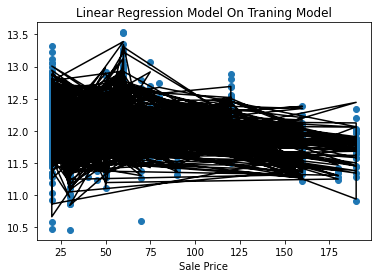

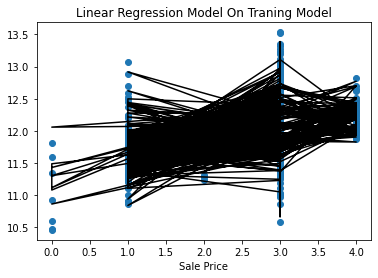

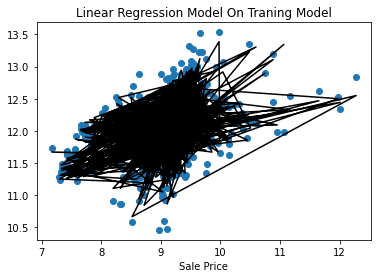

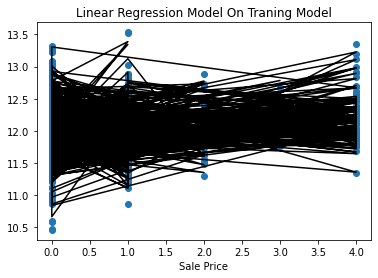

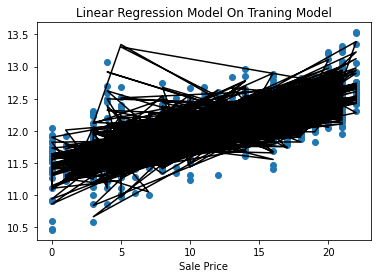

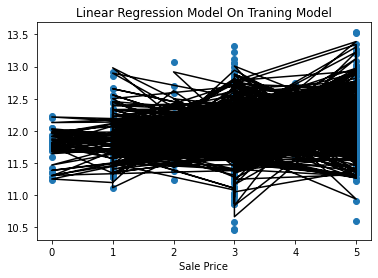

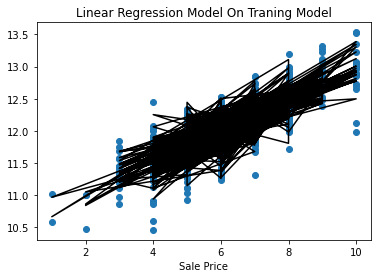

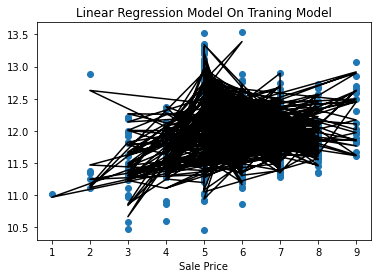

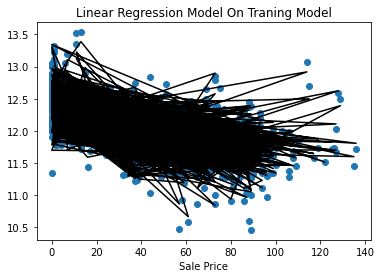

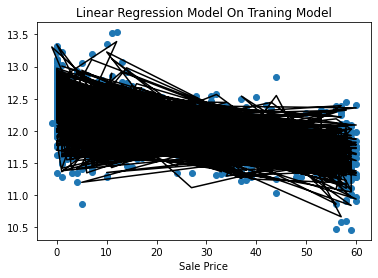

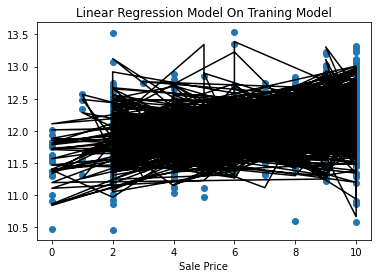

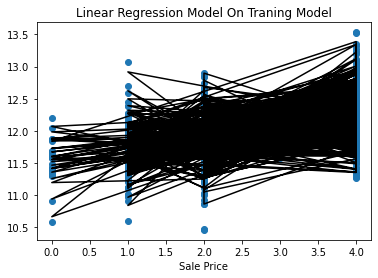

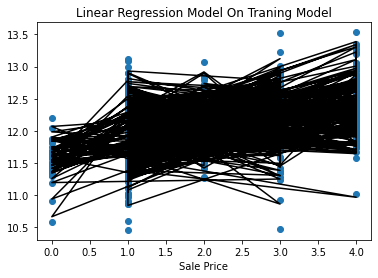

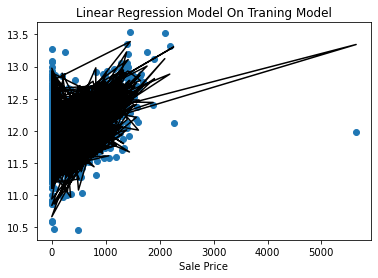

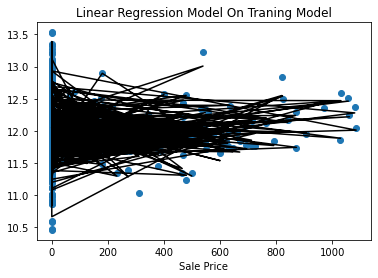

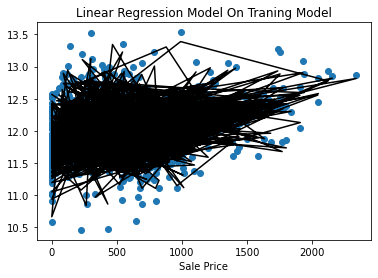

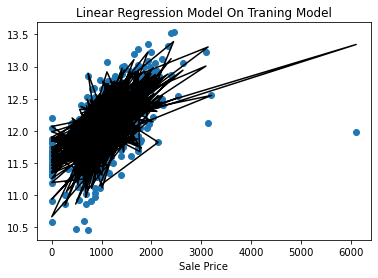

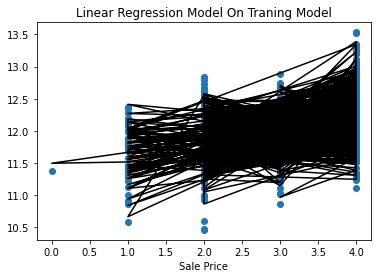

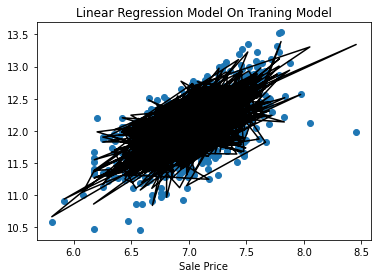

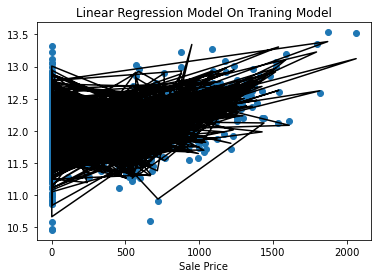

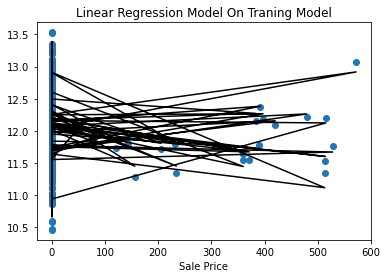

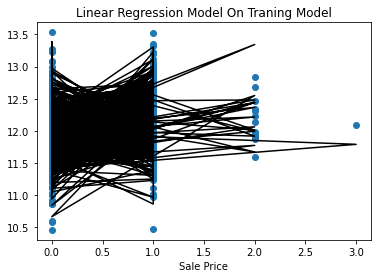

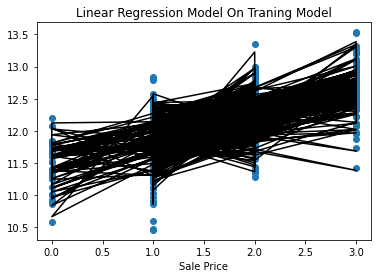

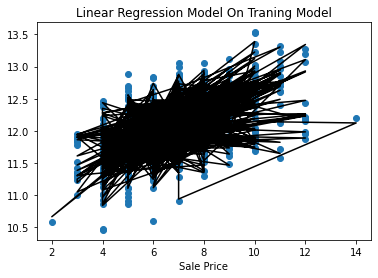

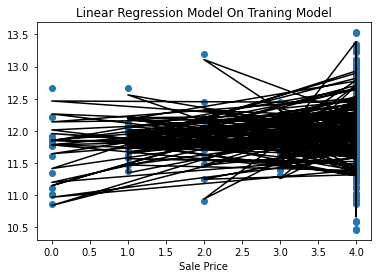

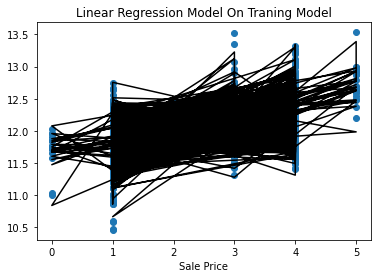

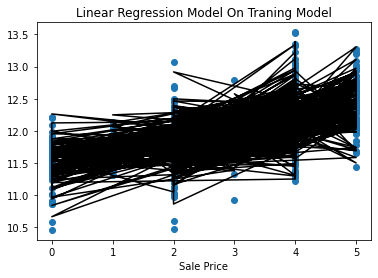

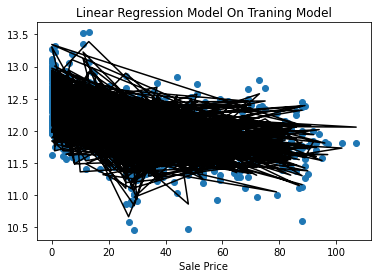

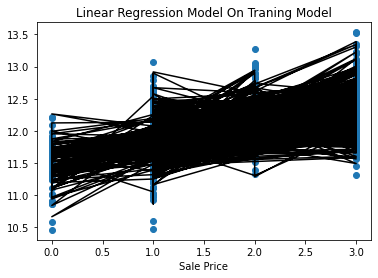

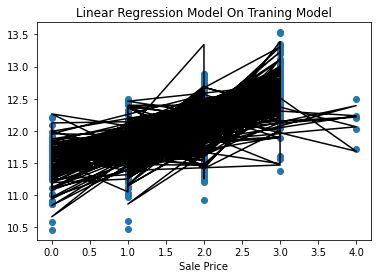

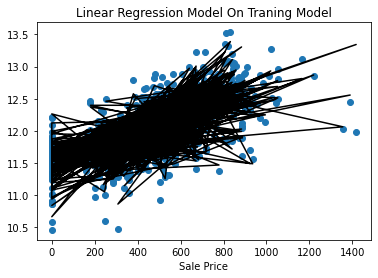

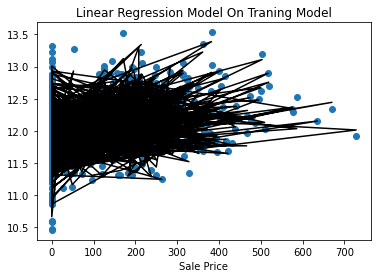

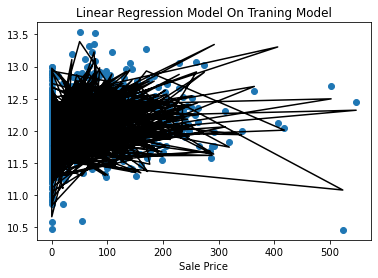

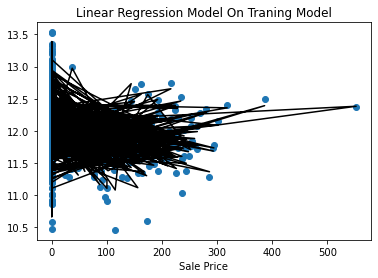

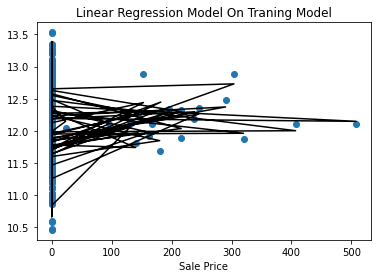

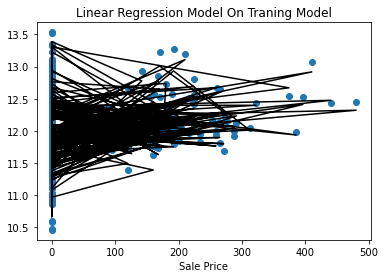

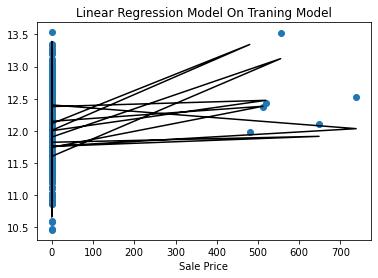

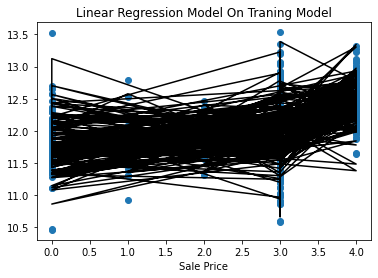

In [90]:
for i in range(0,38):
    plt.scatter(X_train.iloc[:,i],y_train)
    plt.plot(X_train.iloc[:,i],yhat_train,color='black')
    plt.xlabel('X_Train')
    plt.xlabel('Sale Price')
    plt.title('Linear Regression Model On Traning Model')
    plt.show()

### Gradient Boosting Regressor

In [91]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [92]:
yhat_dev_gbr = gbr.predict(X_test)
print(f"R2 Score on Train set is : {gbr.score(X_train,y_train)}")
print(f"R2 Score on Dev set is : {gbr.score(X_test,y_test)}")

R2 Score on Train set is : 0.9563811674767335
R2 Score on Dev set is : 0.9097385779627815


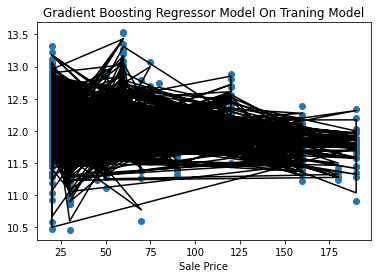

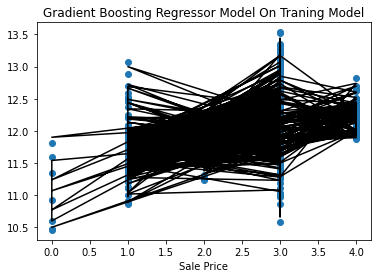

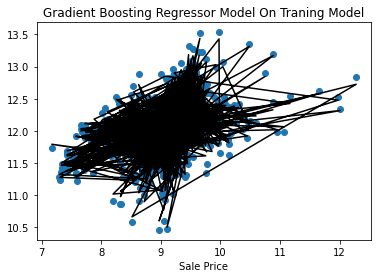

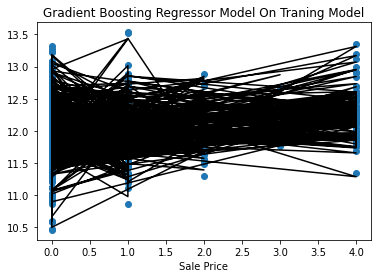

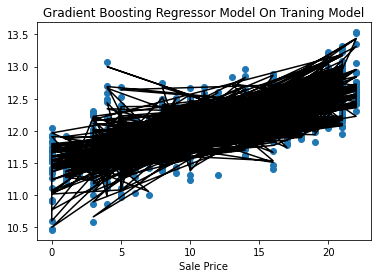

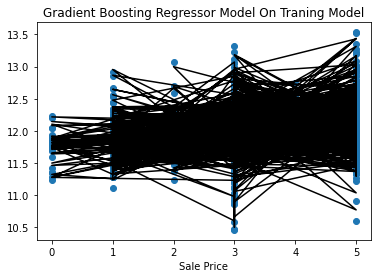

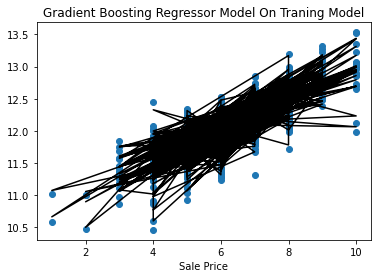

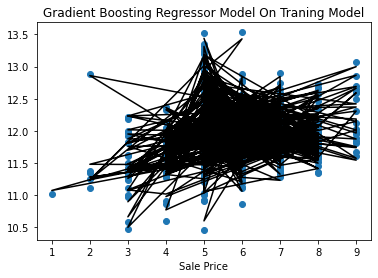

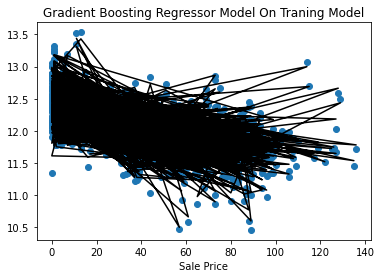

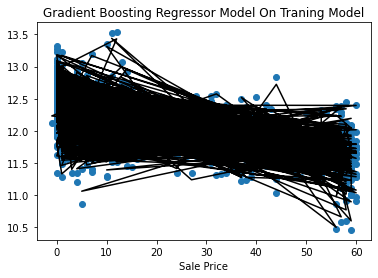

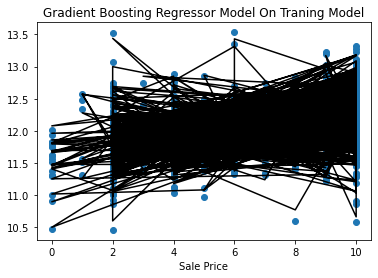

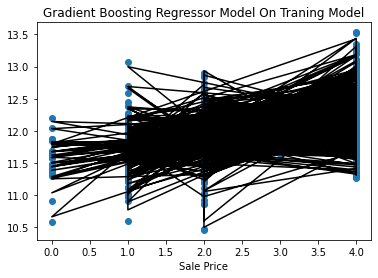

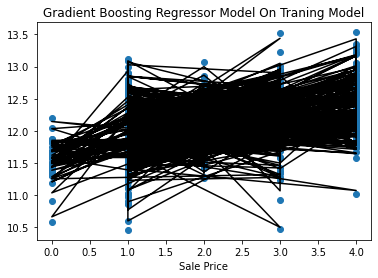

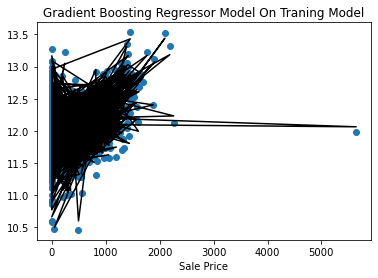

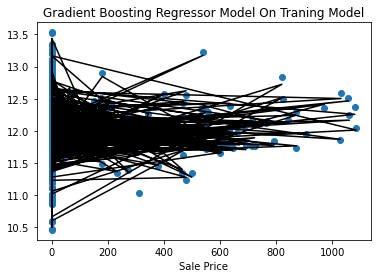

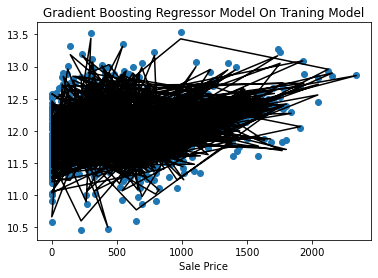

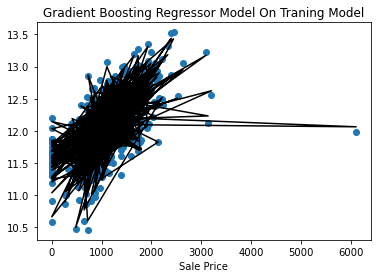

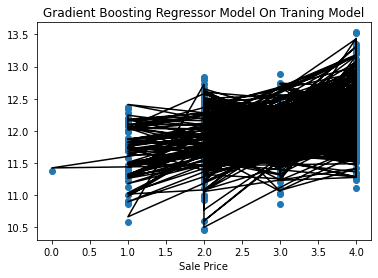

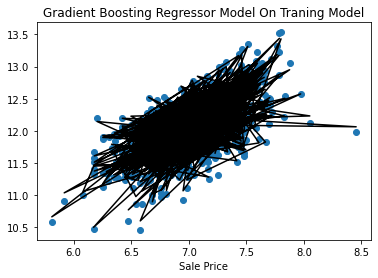

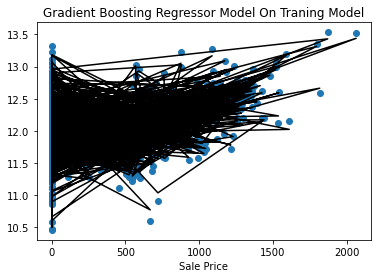

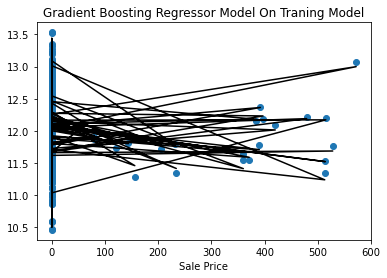

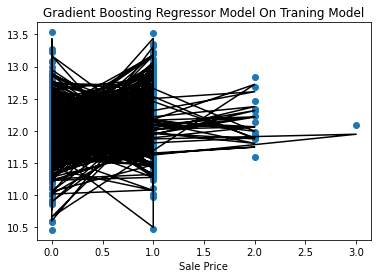

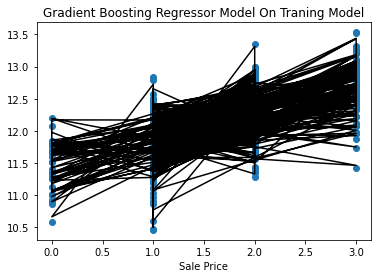

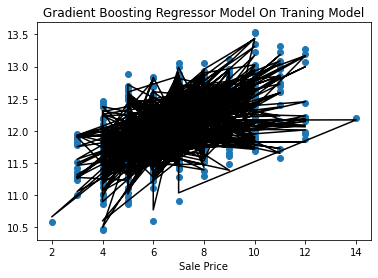

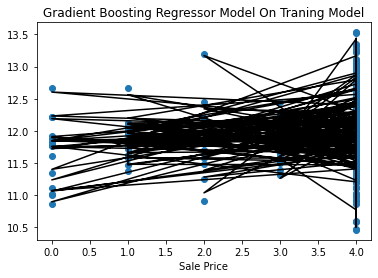

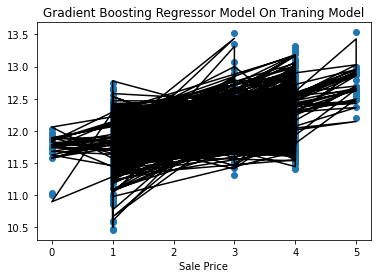

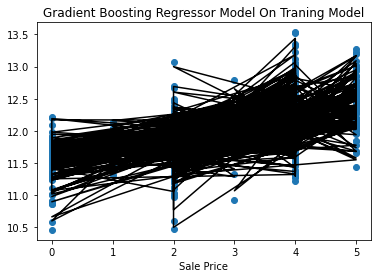

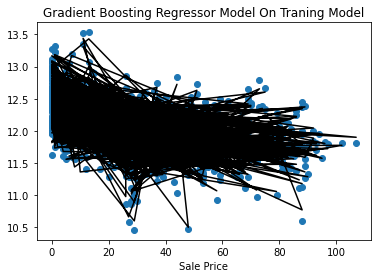

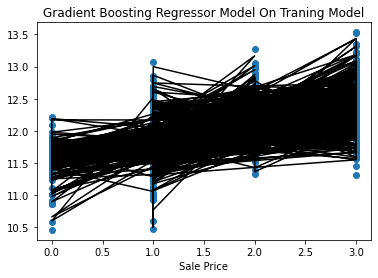

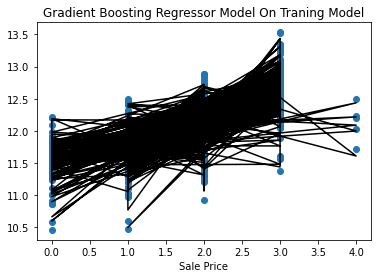

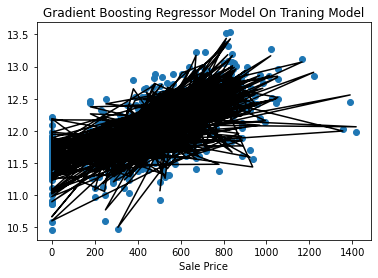

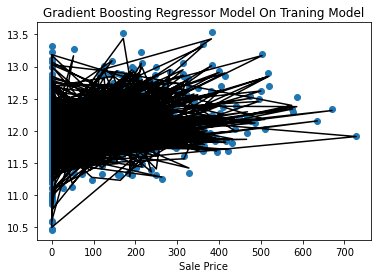

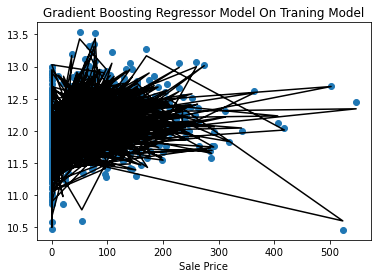

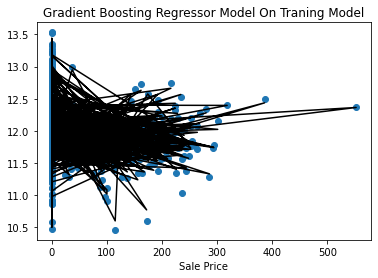

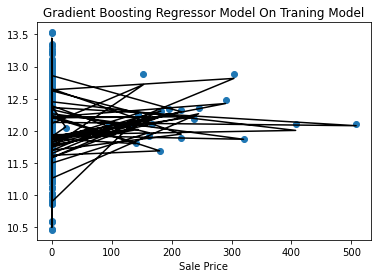

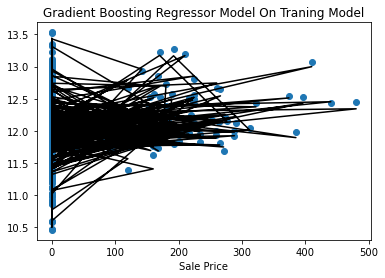

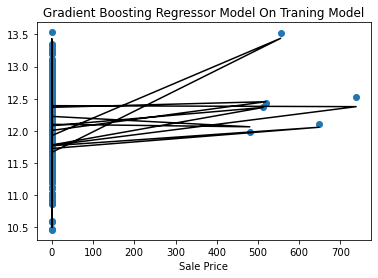

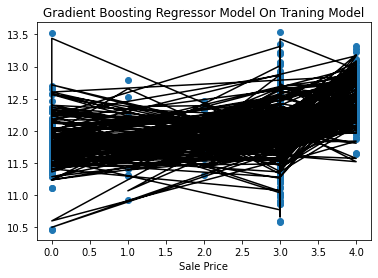

In [93]:
for i in range(0,38):
    plt.scatter(X_train.iloc[:,i],y_train)
    plt.plot(X_train.iloc[:,i],gbr.predict(X_train),color='black')
    plt.xlabel('X_Train')
    plt.xlabel('Sale Price')
    plt.title('Gradient Boosting Regressor Model On Traning Model')
    plt.show()

**As We can see Dataset Shows Better Results For Gradient Boosting Regressor So We Make Our Final Test Predictions on the Gradient Boosting Regressor Model**

# Prediction

In [102]:
ypred = gbr.predict(X_TestData)
ypred

array([12.10601979, 12.18221122, 12.19283169, ..., 12.18525069,
       11.97538724, 12.34471416])

In [103]:
test_data.iloc[:,0]

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [104]:
Saleprice = pd.DataFrame(test_data.iloc[:,0], columns=['Id'])
Saleprice

Id
0     1461
1     1462
2     1463
3     1464
4     1465
...    ...
1454  2915
1455  2916
1456  2917
1457  2918
1458  2919

[1459 rows x 1 columns]

In [105]:
Saleprice['SalePrice'] = ypred
Saleprice

Id  SalePrice
0     1461  12.106020
1     1462  12.182211
2     1463  12.192832
3     1464  12.231359
4     1465  12.565112
...    ...        ...
1454  2915  11.839698
1455  2916  11.957428
1456  2917  12.185251
1457  2918  11.975387
1458  2919  12.344714

[1459 rows x 2 columns]

In [99]:
Saleprice.to_csv('House_SalePrice.csv',index=False)